What is wrong with healthcare in Massandopolis?

First, let's take a look at the data.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
allergies = pd.read_csv('massandopolis/allergies.csv')
careplans = pd.read_csv('massandopolis/careplans.csv')
concepts = pd.read_csv('massandopolis/concepts.csv')
conditions = pd.read_csv('massandopolis/conditions.csv')
encounters = pd.read_csv('massandopolis/encounters.csv')
imaging_studies = pd.read_csv('massandopolis/imaging_studies.csv')
immunizations = pd.read_csv('massandopolis/immunizations.csv')
medications = pd.read_csv('massandopolis/medications.csv')
observations = pd.read_csv('massandopolis/observations.csv')
organizations = pd.read_csv('massandopolis/organizations.csv')
patients = pd.read_csv('massandopolis/patients.csv')
procedures = pd.read_csv('massandopolis/procedures.csv')
providers = pd.read_csv('massandopolis/providers.csv')

After looking at the data in each table, I realized there is a lot of information! 

I want to start by looking at patients' deaths. If something about Massandopolis' healthcare system is causing people to die at a younger age, or is causing more deaths around a specific time, this would be something to look into.

In [3]:
cod = observations[observations['DESCRIPTION'].str.contains('(?i).*death.*')]
cod['VALUE'].value_counts()

Natural death with unknown cause                            1421
Drug overdose                                                297
Sudden Cardiac Death                                         274
Myocardial Infarction                                        214
Non-small cell lung cancer (disorder)                        106
Stroke                                                       101
Pneumonia                                                     74
Neoplasm of prostate                                          73
Pulmonary emphysema (disorder)                                57
Cardiac Arrest                                                57
Alzheimer's disease (disorder)                                52
Malignant tumor of colon                                      32
Chronic obstructive bronchitis (disorder)                     31
Bullet wound                                                  29
Secondary malignant neoplasm of colon                         25
Familial Alzheimer's dise

In [4]:
cod['DATE'] = pd.to_datetime(cod['DATE'])
cod['DATE_YEAR'] = cod['DATE'].dt.year

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


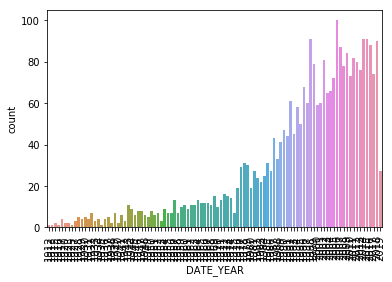

In [5]:
sns.countplot(x='DATE_YEAR', data=cod)
plt.xticks(rotation='vertical')
plt.show()

While deaths per year is increasing over time, this could be due population growth. There are no obvious outliers for an increase in deaths during a specific time period.

I will look into age at death to ensure there are no outliers there either.

In [6]:
age_at_death = cod.merge(right=patients, how='left', left_on='PATIENT', right_on='Id', suffixes=('_cod', '_pxs'))
age_at_death['BIRTHDATE'] = pd.to_datetime(age_at_death['BIRTHDATE'])
age_at_death['AGE_AT_DEATH'] = (age_at_death['DATE'] - age_at_death['BIRTHDATE'])/np.timedelta64(1,'Y')
age_at_death['AGE_AT_DEATH'] = age_at_death['AGE_AT_DEATH'].round(0)

In [7]:
age_at_death.head(1)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE,DATE_YEAR,Id,...,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,ZIP,AGE_AT_DEATH
0,2019-01-14,d709f84f-7d2c-440b-a979-2bc27d41f63a,da81b343-806a-4427-b83c-b192cca4526a,69453-9,Cause of Death [US Standard Certificate of Death],Natural death with unknown cause,NaN,text,2019,d709f84f-7d2c-440b-a979-2bc27d41f63a,...,NaN,black,dominican,F,Lynn Massandopolis US,535 Romaguera Annex Unit 82,Boston,Massandopolis,2108.0,25.0


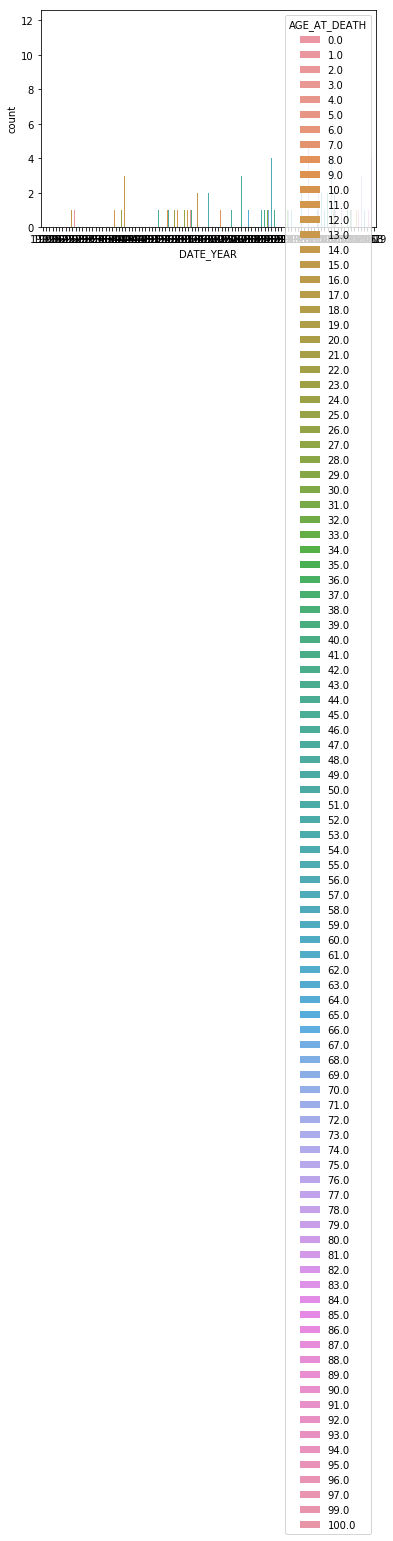

<Figure size 3600x720 with 0 Axes>

In [8]:
sns.countplot(x='DATE_YEAR',hue='AGE_AT_DEATH', data=age_at_death)
plt.figure(figsize=(50,10))
plt.show()

Data not displayed effectively in this kind of chart. I will round the age at death column into fewer categories and loop through decades to more effectively display the data.

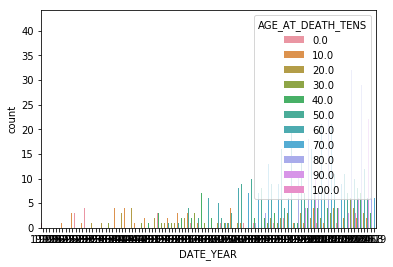

<Figure size 7200x3600 with 0 Axes>

In [9]:
age_at_death['AGE_AT_DEATH_TENS'] = age_at_death['AGE_AT_DEATH'].round(-1)
sns.countplot(x='DATE_YEAR', hue='AGE_AT_DEATH_TENS', data=age_at_death[['AGE_AT_DEATH_TENS', 'DATE_YEAR']])
plt.figure(figsize=(100,50))
plt.show()

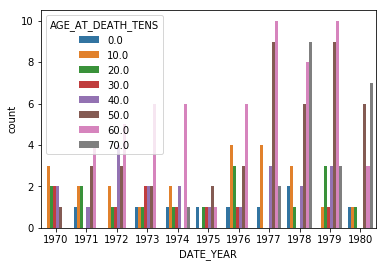

<Figure size 7200x3600 with 0 Axes>

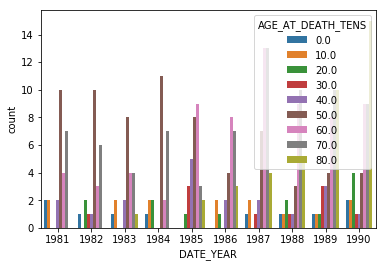

<Figure size 7200x3600 with 0 Axes>

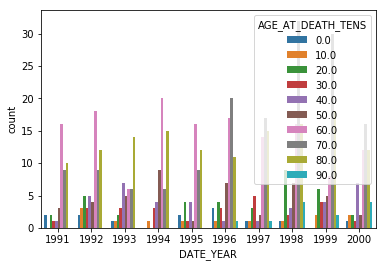

<Figure size 7200x3600 with 0 Axes>

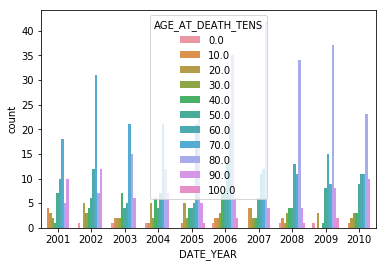

<Figure size 7200x3600 with 0 Axes>

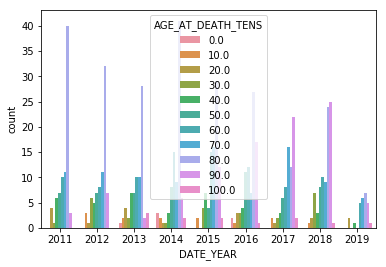

<Figure size 7200x3600 with 0 Axes>

In [10]:
year_pairs = [(1970, 1980), (1981, 1990), (1991, 2000), (2001, 2010), (2011, 2019)]
for start, end in year_pairs:
    sns.countplot(x='DATE_YEAR', hue='AGE_AT_DEATH_TENS', data=age_at_death[age_at_death['DATE_YEAR'].between(start, end)][['AGE_AT_DEATH_TENS', 'DATE_YEAR']])
    plt.figure(figsize=(100,50))
    plt.show()

Again, there are no obvious trends of younger people dying during a specific period of time.

I will move on from deaths, and look into conditions.

In [11]:
conditions['DESCRIPTION'].value_counts()

Viral sinusitis (disorder)                                               16893
Acute viral pharyngitis (disorder)                                        9389
Acute bronchitis (disorder)                                               7686
Normal pregnancy                                                          6079
Drug overdose                                                             4710
Body mass index 30+ - obesity (finding)                                   4143
Anemia (disorder)                                                         2979
Chronic pain                                                              2891
Prediabetes                                                               2871
Chronic intractable migraine without aura                                 2857
Impacted molars                                                           2838
Hypertension                                                              2247
Otitis media                                        

Massandopolis' most common condition is viral sinusitis, or sinus infections. Let's look into how sinus infections develop in Massandopolis over time.

In [12]:
viral_sinusitis = conditions[conditions['DESCRIPTION'] == 'Viral sinusitis (disorder)']
viral_sinusitis.head(1)
viral_sinusitis['START'] = pd.to_datetime(viral_sinusitis['START'])
viral_sinusitis['STOP'] = pd.to_datetime(viral_sinusitis['STOP'])
viral_sinusitis['DURATION'] = viral_sinusitis['STOP'] - viral_sinusitis['START']
viral_sinusitis['DURATION'].value_counts()

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

7 days     5677
21 days    5580
14 days    5521
22 days      21
20 days      18
15 days      17
13 days       9
8 days        6
6 days        4
Name: DURATION, dtype: int64

There is not much notable about the duration of the sinus infections in Massandopolis. Most are between 1-3 weeks, which is expected for sinus infections.

In [13]:
viral_sinusitis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16893 entries, 5 to 109713
Data columns (total 7 columns):
START          16893 non-null datetime64[ns]
STOP           16853 non-null datetime64[ns]
PATIENT        16893 non-null object
ENCOUNTER      16893 non-null object
CODE           16893 non-null int64
DESCRIPTION    16893 non-null object
DURATION       16853 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 1.0+ MB


In [14]:
viral_sinusitis['MONTH_START'] = viral_sinusitis['START'].apply(lambda x: x.replace(day=1))
viral_sinusitis['YEAR_START'] = viral_sinusitis['START'].apply(lambda x: x.year)

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


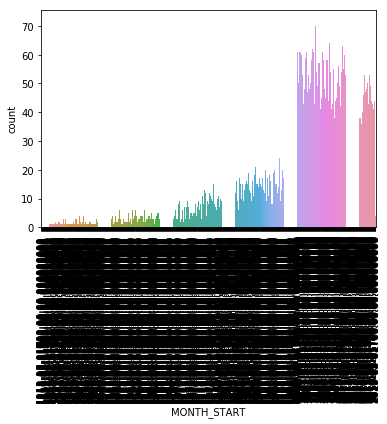

In [15]:
sns.countplot(x='MONTH_START', data=viral_sinusitis)
plt.xticks(rotation='vertical')
plt.show()

There's a distinct increase in sinus infections, but the chart is too small to effectively display the x-axis. I'll look into a chart that looks at the year of sinus infection diagnosis.

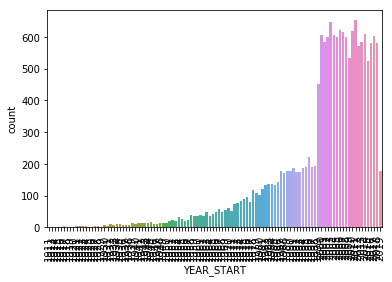

In [16]:
sns.countplot(x='YEAR_START', data=viral_sinusitis)
plt.xticks(rotation='vertical')
plt.show()

Chart is still too small, will look at a smaller subset of the data.

In [17]:
viral_sinusitis_later = viral_sinusitis[viral_sinusitis['YEAR_START'].between(1990, 2019)]

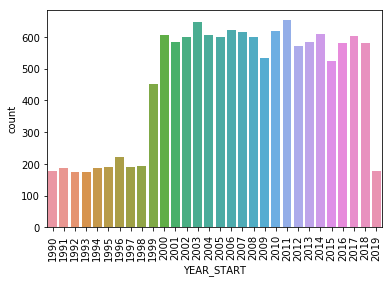

In [18]:
sns.countplot(x='YEAR_START', data=viral_sinusitis_later)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
viral_sinusitis[viral_sinusitis['YEAR_START']==1998].shape 
# 193 incidences of viral sinusitis in 1998

viral_sinusitis[viral_sinusitis['YEAR_START']==1999].shape
# 451 incidences of viral sinusitis in 1999

viral_sinusitis[viral_sinusitis['YEAR_START']==2000].shape
# 606 incidences of viral sinusitis in 200

(606, 9)

There's a large jump in cases of sinusitis from 1998 to 1999 (193 to 451).

There's also a large jump in cases of sinusitis from 1999 to 2000 (451 to 606).

I want to see if this jump in sinusitis incidences is an artifact of EMR being adopted. I will do this by comparing the rate of increase with all conditions.

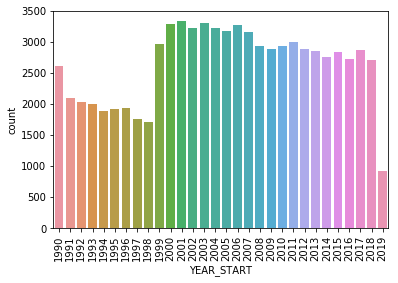

<Figure size 1152x288 with 0 Axes>

In [20]:
conditions2 = conditions
conditions2['START'] = pd.to_datetime(conditions2['START'])
conditions2['YEAR_START'] = conditions2['START'].apply(lambda x:x.year)
conditions2_later = conditions2[conditions2['YEAR_START'].between(1990, 2019)]
ax = sns.countplot(x='YEAR_START', data=conditions2_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

In [21]:
conditions2[conditions2['YEAR_START']==1998].shape 
# 1715 incidences in 1998

conditions2[conditions2['YEAR_START']==1999].shape
# 2964 incidences of viral sinusitis in 1999

conditions2[conditions2['YEAR_START']==2000].shape
# 3294 incidences of viral sinusitis in 200

(3294, 7)

In [22]:
# % increase of sinusitis 
606.0/193.0 * 100 # 314%

# % increase of all conditions
3294.0/1715.0 * 100 # 192%

192.06997084548107

Sinusitis increased by 314% from 1998 to 2000, while all conditions rose by 192% from 1998 to 2000. This signals that the increase in sinusitis diagnoses is not solely an artifact of increased EMR. 

At this point, let's look to see if there is a specific point in time that triggered the increase in viral sinusitis diagnoses.

In [23]:
date1 = viral_sinusitis_later['MONTH_START'] >= '1997-01-01'
date2 = viral_sinusitis_later['MONTH_START'] <= '2001-01-01'
viral_sinusitis_later2 = viral_sinusitis_later[date1 & date2]

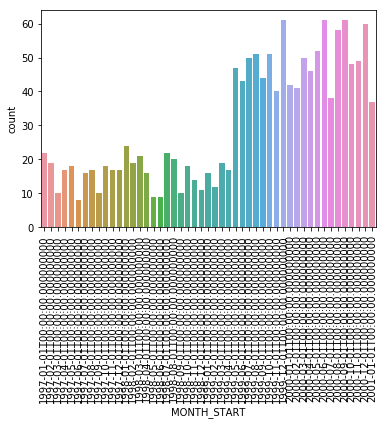

<Figure size 1152x288 with 0 Axes>

In [24]:
ax = sns.countplot(x='MONTH_START', data=viral_sinusitis_later2)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

In [25]:
viral_sinusitis_later2[viral_sinusitis_later2['MONTH_START'] == '1999-04-01'].shape # 17
viral_sinusitis_later2[viral_sinusitis_later2['MONTH_START'] == '1999-05-01'].shape # 47

# % increase of sinusitis from 1999-04-01 to 1999-05-01 - 276%
47.0/17.0 * 100

276.4705882352941

In one month, viral sinusitis diagnoses increased 276%.


Sinusitis have similar symptoms as allergies. I'll explore to see if allergies increase in the same time period that sinusitis did.

In [26]:
allergies['START'] = pd.to_datetime(allergies['START'])
allergies['MONTH_START'] = allergies['START'].apply(lambda x: x.replace(day=1))
allergies['YEAR_START'] = allergies['START'].apply(lambda x: x.year)

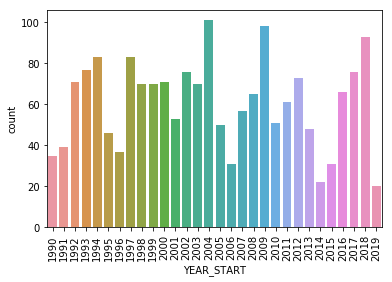

<Figure size 1152x288 with 0 Axes>

In [27]:
allergies_later = allergies[allergies['YEAR_START'].between(1990, 2019)]
ax = sns.countplot(x='YEAR_START', data=allergies_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

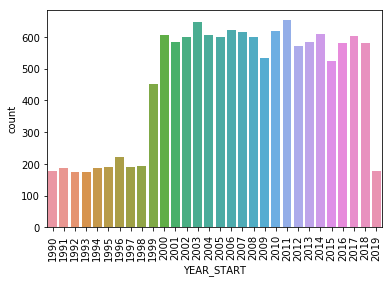

<Figure size 1152x288 with 0 Axes>

In [28]:
# viral sinusitis in the same time period, for comparison
ax = sns.countplot(x='YEAR_START', data=viral_sinusitis_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

It does not look like the increase in viral sinusitis around 1999 is correlated with allergies.

Perhaps sinus infections are related to immunizations.

In [29]:
immunizations['DATE'] = pd.to_datetime(immunizations['DATE'])
immunizations['MONTH_START'] = immunizations['DATE'].apply(lambda x: x.replace(day=1))
immunizations['YEAR_START'] = immunizations['DATE'].apply(lambda x: x.year)

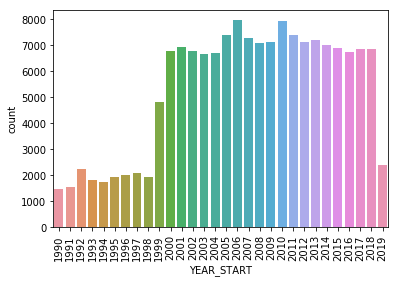

<Figure size 1152x288 with 0 Axes>

In [30]:
immunizations_later = immunizations[immunizations['YEAR_START'].between(1990, 2019)]
ax = sns.countplot(x='YEAR_START', data=immunizations_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

Interestingly enough, it looks like the increase in vaccinations is correlated with the increase in sinusitis. Let's look at flu vaccines.

In [31]:
immunizations_flu = immunizations[immunizations['DESCRIPTION'] == 'Influenza  seasonal  injectable  preservative free']
immunizations_flu['DATE'] = pd.to_datetime(immunizations_flu['DATE']) # on't need
immunizations_flu['MONTH_START'] = immunizations_flu['DATE'].apply(lambda x: x.replace(day=1))
immunizations_flu['YEAR_START'] = immunizations_flu['DATE'].apply(lambda x: x.year)

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

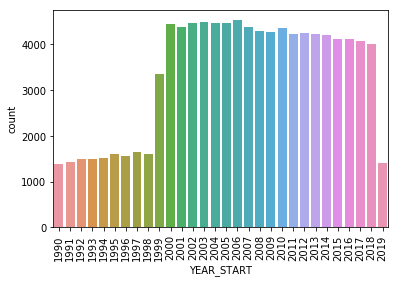

<Figure size 1152x288 with 0 Axes>

In [32]:
immunizations_flu_later = immunizations_flu[immunizations_flu['YEAR_START'].between(1990, 2019)]
ax = sns.countplot(x='YEAR_START', data=immunizations_flu_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

In [33]:
immunizations_flu[immunizations_flu['YEAR_START'] == 1998].shape # 1604
immunizations_flu[immunizations_flu['YEAR_START'] == 1999].shape # 3359
immunizations_flu[immunizations_flu['YEAR_START'] == 2000].shape # 4454

immunizations[immunizations['YEAR_START'] == 1998].shape # 1959
immunizations[immunizations['YEAR_START'] == 1999].shape # 4835
immunizations[immunizations['YEAR_START'] == 2000].shape # 6802

(6802, 7)

In [34]:
4454.0/1604.0 * 100
# increase in flu immunizations from 1998 to 2000 is 278%

6802.0/1959.0 * 100
# increase in all immunization from 1998 to 2000 is 347% 

347.2179683511996

This result is interesting and unexpected! The increase in immunizations (all, and flu-specific) are both larger than the increase in all conditions (192%), which suggests that the increase in immunizations is more than an artifact of more EHR.

The flu can sometimes results in sinus infections, so I thought if flu vaccines decreased, an increase in flu would be observed, which could maybe epxlain the increase in sinus infections. 

Another reason for an increase in sinus infections could be an increase in antibiotic use. Physicians often over-prescribe antibiotics for sinus infections, which can lead to antibiotic-resistant bacteria, which could lead to population-wide increase in sinus infections. Prescribing antibiotics also effects a patient's microbiome, can weaken their immune system, and the patient will take longer to recover from the viral sinus infection. This longer recovery period could increase the number of people an infected person comes in contact with, and cause an increase in sinus infections in a population.

In [35]:
medications[medications['REASONDESCRIPTION'] == 'Viral sinusitis (disorder)']['DESCRIPTION'].value_counts()

Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet    3342
Name: DESCRIPTION, dtype: int64

Amoxicillin is often prescribed to treat viral sinusitis. Let's look at Amoxicillin use over time.

In [36]:
medications['START'] = pd.to_datetime(medications['START'])
medications['MONTH_START'] = medications['START'].apply(lambda x: x.replace(day=1))
medications['YEAR_START'] = medications['START'].apply(lambda x: x.year)
medications_later = medications[medications['YEAR_START'].between(1990, 2019)]
medications_amoxi_later = medications_later[medications_later['DESCRIPTION'] == 'Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet']

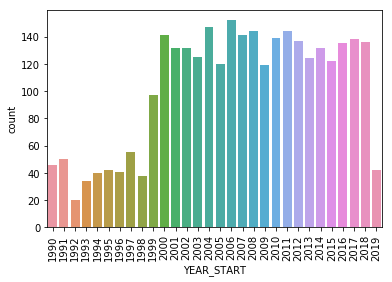

<Figure size 1152x288 with 0 Axes>

In [37]:
ax = sns.countplot(x='YEAR_START', data=medications_amoxi_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

This looks promising! But, this could just be due to the fact that there is more sinusitis, so more doctors are treating their patients with amoxicillin.

I want to look at number of all patients (not just sinusitis) being treated with amoxicillin. Since we are interested in antibiotic resistant becateria, I will also look at all antibiotic use, rather than just amoxicillin.

In [38]:
medications[medications['DESCRIPTION']=='Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet']['REASONDESCRIPTION'].value_counts()

Viral sinusitis (disorder)              3342
Acute bacterial sinusitis (disorder)     213
Sinusitis (disorder)                     177
Name: REASONDESCRIPTION, dtype: int64

In [39]:
medications.groupby('DESCRIPTION', as_index=False).agg({'PATIENT':'count'}).sort_values('PATIENT', ascending=False)[0:50]
medications.groupby('DESCRIPTION', as_index=False).agg({'PATIENT':'count'}).sort_values('PATIENT', ascending=False)[51:100]
medications.groupby('DESCRIPTION', as_index=False).agg({'PATIENT':'count'}).sort_values('PATIENT', ascending=False)[101:150]

antibiotics = ['Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet',
               'Penicillin V Potassium 500 MG Oral Tablet',
               'Penicillin V Potassium 250 MG Oral Tablet',
               'Amoxicillin 250 MG Oral Capsule',
               'Cefuroxime 250 MG Oral Tablet',
               'Amoxicillin 500 MG Oral Tablet',
               'Cefaclor 250 MG Oral Capsule',
               'Penicillin G 375 MG/ML Injectable Solution',
               'Piperacillin 4000 MG / tazobactam 500 MG Injection',
               '12 HR Cefaclor 500 MG Extended Release Oral Tablet',
               'Ampicillin 100 MG/ML Injectable Solution',
               'Doxycycline Monohydrate 50 MG Oral Tablet',
               'Doxycycline Monohydrate 100 MG Oral Tablet',
               'Ciprofloxacin 10MG/ML']

In [40]:
medications_ab = medications[medications['DESCRIPTION'].isin(antibiotics)]
medications_ab_later = medications_ab[medications_ab['YEAR_START'].between(1990, 2019)]

In [41]:
medications_ab['REASONDESCRIPTION'].value_counts()

Viral sinusitis (disorder)                    3342
Streptococcal sore throat (disorder)          2034
Acute bacterial sinusitis (disorder)           213
Sinusitis (disorder)                           177
Acute viral pharyngitis (disorder)             134
Infection caused by Pseudomonas aeruginosa       2
Name: REASONDESCRIPTION, dtype: int64

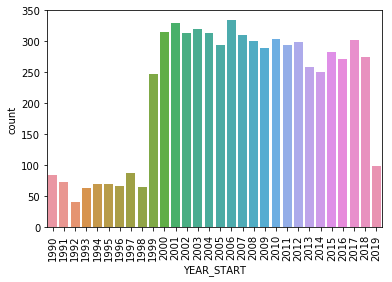

<Figure size 1152x288 with 0 Axes>

In [42]:
ax = sns.countplot(x='YEAR_START', data=medications_ab_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

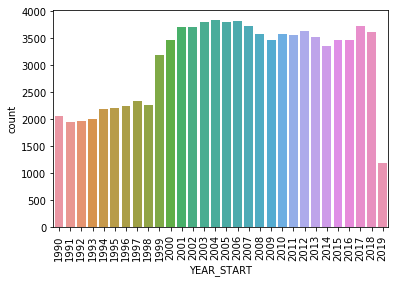

<Figure size 1152x288 with 0 Axes>

In [43]:
ax = sns.countplot(x='YEAR_START', data=medications_later)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

Let's compare the rate of increase of antibiotics and medications in total from 1998 to 2000

In [44]:
medications[medications['YEAR_START'] == 1998].shape # 2261
medications[medications['YEAR_START'] == 2000].shape # 3463

medications_ab_later[medications_ab_later['YEAR_START'] == 1998].shape # 65
medications_ab_later[medications_ab_later['YEAR_START'] == 2000].shape # 315

(315, 11)

In [45]:
# % increase of meds 
3463.0/2261.0 * 100 # 153%

# % increase of antibiotics
315.0/65.0 * 100 # 485%

484.6153846153846

The 485% increase in use of antibiotics between 1998 and 2000 is much greater than the 153% increase use of any medication. 485% increase in antibiotics is also larger than the 314% increase in sinusitis. This is compelling, so I will look more into antibiotic prescriptions.

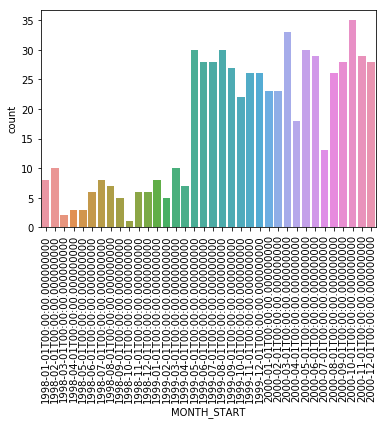

<Figure size 1152x288 with 0 Axes>

In [46]:
ax = sns.countplot(x='MONTH_START', data=medications_ab_later[medications_ab_later['YEAR_START'].between(1998, 2000)])
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

There is a marked increase in antibiotic prescriptions between April and May of 1999. 

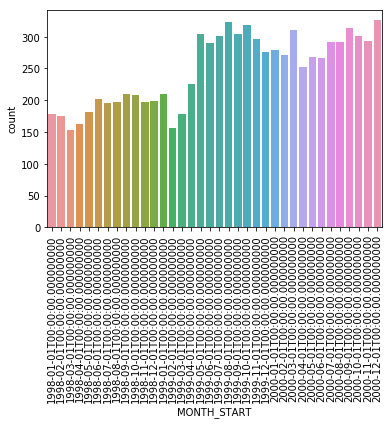

<Figure size 1152x288 with 0 Axes>

In [47]:
ax = sns.countplot(x='MONTH_START', data=medications_later[medications_later['YEAR_START'].between(1998, 2000)])
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

In [48]:
medications_ab_later[medications_ab_later['MONTH_START'] == '1999-04-01'].shape # 7
medications_ab_later[medications_ab_later['MONTH_START'] == '1999-05-01'].shape # 30

medications_later[medications_later['MONTH_START'] == '1999-04-01'].shape # 225
medications_later[medications_later['MONTH_START'] == '1999-05-01'].shape # 304

(304, 11)

In [49]:
# % increase of antibiotics between 1999-04-01 and 1999-05-01 
30.0/7.0 * 100 # 429%

# % increase of medications between 1999-04-01 and 1999-05-01
304.0/225.0 * 100 # 135%

135.11111111111111

Given that the increase of antibiotics is much more than the increase of medications between the two months, the increase in antibiotics is probably not an artifact of increased medication data in general.

I will look more into antibiotic prescriptions for patients diagnosed with sinusitis. Perhaps the proportion of sinusitis patients who are prescribed antibiotics increasess over time, especially around 1999.

In [50]:
viral_sinusitis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16893 entries, 5 to 109713
Data columns (total 9 columns):
START          16893 non-null datetime64[ns]
STOP           16853 non-null datetime64[ns]
PATIENT        16893 non-null object
ENCOUNTER      16893 non-null object
CODE           16893 non-null int64
DESCRIPTION    16893 non-null object
DURATION       16853 non-null timedelta64[ns]
MONTH_START    16893 non-null datetime64[ns]
YEAR_START     16893 non-null int64
dtypes: datetime64[ns](3), int64(2), object(3), timedelta64[ns](1)
memory usage: 1.9+ MB


In [51]:
viral_sinusitis_meds = viral_sinusitis.merge(medications, on='PATIENT', how='left', suffixes=['_sinusitis', '_meds'])

mask1 = viral_sinusitis_meds['START_meds'] >= viral_sinusitis_meds['START_sinusitis']
mask2 = viral_sinusitis_meds['START_meds'] <= viral_sinusitis_meds['STOP_sinusitis']
viral_sinusitis_meds2 = viral_sinusitis_meds[mask1 & mask2]
viral_sinusitis_meds2['AB'] = viral_sinusitis_meds2['DESCRIPTION_meds'].isin(antibiotics)
viral_sinusitis_meds3 = viral_sinusitis_meds2.groupby(['PATIENT', 'START_sinusitis', 'STOP_sinusitis', 'MONTH_START_sinusitis', 'YEAR_START_sinusitis'], as_index=False).agg({'AB': 'sum'})
viral_sinusitis_meds3['AB_bool'] = viral_sinusitis_meds3['AB'] > 0

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


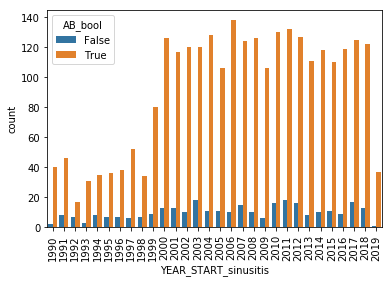

<Figure size 1152x288 with 0 Axes>

In [52]:
ax = sns.countplot(x='YEAR_START_sinusitis', data=viral_sinusitis_meds3[viral_sinusitis_meds3['YEAR_START_sinusitis'].between(1990,2019)], hue='AB_bool')
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

This chart would make more sense if y axis was proportion of sinusitis patients who were prescribed anibiotics, rather than count.

In [53]:
percentage_lst = []
for year in range(1990, 2020):
    viral_sinusitis_meds3_year = viral_sinusitis_meds3[viral_sinusitis_meds3['YEAR_START_sinusitis'] == year]
    AB_num = viral_sinusitis_meds3_year[viral_sinusitis_meds3_year['AB_bool'] == True].shape[0] # 40
    no_AB_num = viral_sinusitis_meds3_year[viral_sinusitis_meds3_year['AB_bool'] == False].shape[0] # 2
    percentage_on_AB = float(AB_num)/float(AB_num+no_AB_num)
    percentage_lst.append([year, percentage_on_AB, AB_num, no_AB_num])

In [54]:
percentage_lst
percentage_df = pd.DataFrame(percentage_lst)
percentage_df.rename(columns={0 :'YEAR_START', 1: 'PERCENTAGE'}, inplace=True)
percentage_df.head(1)

,YEAR_START,PERCENTAGE,2,3
0,1990,0.952381,40,2


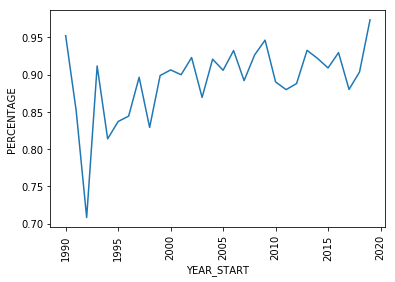

<Figure size 1152x288 with 0 Axes>

In [55]:
ax = sns.lineplot(x='YEAR_START', y='PERCENTAGE', data=percentage_df)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

Although there seems to be an upward trend, nothing of significance around 1999.

In [56]:
viral_sinusitis_meds3_99 = viral_sinusitis_meds3[viral_sinusitis_meds3['YEAR_START_sinusitis'] == 1999]
months_99 = list(viral_sinusitis_meds3_99['MONTH_START_sinusitis'].unique())
months_99.sort()

percentage_lst = []
for month in months_99:
    viral_sinusitis_meds3_month = viral_sinusitis_meds3[viral_sinusitis_meds3['MONTH_START_sinusitis'] == month]
    AB_num = viral_sinusitis_meds3_month[viral_sinusitis_meds3_month['AB_bool'] == True].shape[0] 
    no_AB_num = viral_sinusitis_meds3_month[viral_sinusitis_meds3_month['AB_bool'] == False].shape[0]
    percentage_on_AB = float(AB_num)/float(AB_num+no_AB_num)
    percentage_lst.append([month, percentage_on_AB, AB_num, no_AB_num])

percentage_df_month = pd.DataFrame(percentage_lst)
percentage_df_month.rename(columns={0 :'MONTH_START', 1: 'PERCENTAGE'}, inplace=True)
percentage_df_month

,MONTH_START,PERCENTAGE,2,3
0,1999-01-01,1.000000,4,0
1,1999-02-01,1.000000,1,0
2,1999-03-01,1.000000,6,0
3,1999-04-01,1.000000,2,0
4,1999-05-01,0.909091,10,1
5,1999-06-01,0.857143,6,1
6,1999-07-01,0.909091,10,1
7,1999-08-01,0.857143,6,1
8,1999-09-01,1.000000,8,0
9,1999-10-01,0.714286,5,2


/Users/laurenwiener/anaconda/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


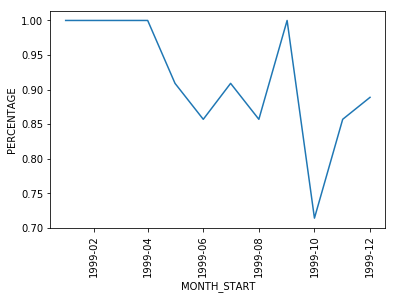

<Figure size 1152x288 with 0 Axes>

In [57]:
ax = sns.lineplot(x='MONTH_START', y='PERCENTAGE', data=percentage_df_month)
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,4))
plt.show()

Between 1999-04-01 and 1999-05-01, the percentage of sinusitis patients who were prescribed antibiotics dropped from 100% to 91%. While the inrease in antibiotic prescriptions between 1998 and 2000 is large, I do not think it is the reason for the increase of sinus infections. However, since many patients with viral sinusitis diagnoses are being prescribed antibiotics, Massandopolis' healthcare system could improve by educating their physicians to take a culture before prescribing antibiotics to patients with sinus infections, as over-prescribing antibiotics can lead to antibiotic resistant bacteria. 

At this point, I've gone through allergies, immunizations, and antibiotic prescriptions as potential factors for the increase in sinus infections. Another factor that could contribute to a rise in sinus infections is smoking. Smokers are at higher risk of sinus infections, and people exposed to second hand smoke are also at higher risk. 

Let's investigate Massandopolis' trends in smoking, specifically around the time of increased sinus infections.

In [58]:
observations[observations['DESCRIPTION'].str.contains('(?i).*smok.*')]['DESCRIPTION'].value_counts()

Tobacco smoking status NHIS    163795
Name: DESCRIPTION, dtype: int64

In [59]:
smoking = observations[observations['DESCRIPTION'] == 'Tobacco smoking status NHIS']
smoking['VALUE'].value_counts()
current_smoking = smoking[smoking['VALUE'] == 'Current every day smoker']
current_smoking['DATE'] = pd.to_datetime(current_smoking['DATE'])
current_smoking['MONTH_START'] = current_smoking['DATE'].apply(lambda x: x.replace(day=1))
current_smoking['YEAR_START'] = current_smoking['DATE'].dt.year
current_smoking_later = current_smoking[current_smoking['YEAR_START'].between(1990, 2019)]

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

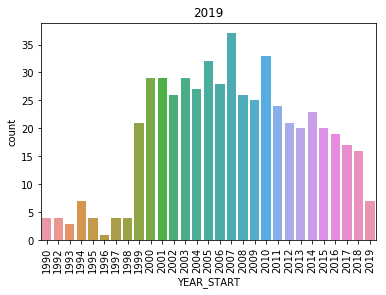

<Figure size 1152x288 with 0 Axes>

In [60]:
ax = sns.countplot(x='YEAR_START', data=current_smoking_later)
plt.xticks(rotation='vertical')
plt.title(year)
plt.figure(figsize=(16,4))
plt.show()

This is a promising result! The number of active smokers increases signficantly between 1998 and 2000.

Let's make sure it's not an artifact of increased observations in general.

In [61]:
observations['DATE'] = pd.to_datetime(observations['DATE'])
observations['MONTH_START'] = observations['DATE'].apply(lambda x: x.replace(day=1))
observations['YEAR_START'] = observations['DATE'].dt.year
observations_later = observations[observations['YEAR_START'].between(1990, 2019)]

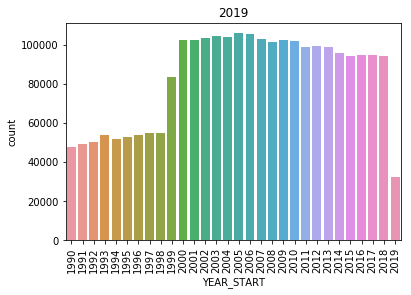

<Figure size 1152x288 with 0 Axes>

In [62]:
ax = sns.countplot(x='YEAR_START', data=observations_later)
plt.xticks(rotation='vertical')
plt.title(year)
plt.figure(figsize=(16,4))
plt.show()

In [63]:
observations_later[observations_later['YEAR_START'] == 1998].shape[0] # 54825
observations_later[observations_later['YEAR_START'] == 2000].shape[0] # 102260

current_smoking_later[current_smoking_later['YEAR_START'] == 1998].shape[0] # 4
current_smoking_later[current_smoking_later['YEAR_START'] == 2000].shape[0] # 29

# % increase of all observations between 1998 and 2000
float(102260)/float(54825) * 100 # 187% increase

# % increase of active smoker status between 1998 and 2000
float(29)/float(4) * 100 # 725% increase 

725.0

The 725% increase of active smoker status is much higher than the 187% increase observed of all observations.

Second hand smoke can cause sinus infections, and the increase of sinus infections between 1998 and 2000 is likely related to the increase in active smokers in that same time period in Massandopolis. 

While this correlation is promising, it should be noted that the population size of smokers in the dataset is limited. The 725% increase is due to 4 active smokers increasing to 29. To further strengthen the assertion that this increase in active smokers is creating health outcomes, let's also investigate the trends of other conditions that may be caused by second-hand smoke. 

In [64]:
conditions['DESCRIPTION'].value_counts()

Viral sinusitis (disorder)                                               16893
Acute viral pharyngitis (disorder)                                        9389
Acute bronchitis (disorder)                                               7686
Normal pregnancy                                                          6079
Drug overdose                                                             4710
Body mass index 30+ - obesity (finding)                                   4143
Anemia (disorder)                                                         2979
Chronic pain                                                              2891
Prediabetes                                                               2871
Chronic intractable migraine without aura                                 2857
Impacted molars                                                           2838
Hypertension                                                              2247
Otitis media                                        

Pharyngitis (a medical term for a soar throat) and bronchitis can also be caused by second-hand smoke. Let's explore the trends in these conditions in relation to the increase of active smokers. 

In [65]:
pharyngitis = conditions2[conditions2['DESCRIPTION'] == 'Acute viral pharyngitis (disorder)']
pharyngitis['MONTH_START'] = pharyngitis['START'].apply(lambda x: x.replace(day=1))
pharyngitis['YEAR_START'] = pharyngitis['START'].apply(lambda x: x.year)
pharyngitis_later = pharyngitis[pharyngitis['YEAR_START'].between(1990, 2019)]

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


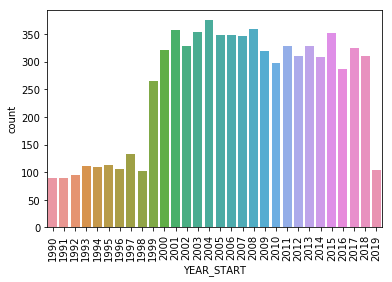

In [66]:
sns.countplot(x='YEAR_START', data=pharyngitis_later)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
pharyngitis_later[pharyngitis_later['YEAR_START'] == 1998].shape # 102
pharyngitis_later[pharyngitis_later['YEAR_START'] == 2000].shape # 322

# % increase of pharyngitis from 1998 to 2000 - 316%
322.0/102.0 * 100

315.6862745098039

In [68]:
bronchitis = conditions2[conditions2['DESCRIPTION'] == 'Acute bronchitis (disorder)']
bronchitis['MONTH_START'] = bronchitis['START'].apply(lambda x: x.replace(day=1))
bronchitis['YEAR_START'] = bronchitis['START'].apply(lambda x: x.year)
bronchitis_later = bronchitis[bronchitis['YEAR_START'].between(1990, 2019)]

/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/laurenwiener/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


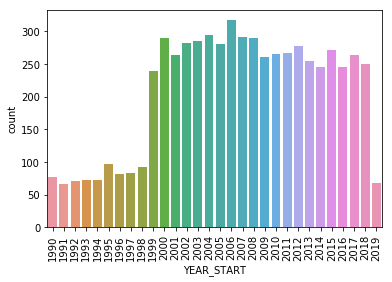

In [69]:
sns.countplot(x='YEAR_START', data=bronchitis_later)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
bronchitis_later[bronchitis_later['YEAR_START'] == 1998].shape # 92
bronchitis_later[bronchitis_later['YEAR_START'] == 2000].shape # 290

# % increase of bronchitis from 1998 to 2000 - 315%
290.0/92.0 * 100

315.2173913043478

Pharyngitis increases 316% between 1998 and 2000, and bronchitis increases 315% between 1998 and 2000, which corresponds to the 725% increase in active smokers in that same time. This is compelling evidence of second-hand smoke causing upper respiratory infections in Massandopolis. 

Massandopolis' healthcare problem is that in the late 90's, their population of active smokers increased, which has lead to an increase in upper respiratory infections. As the state's sole Biomedical Informatician, I would advise the political elite to increase education programs about the health hazards of smoking and the effect second-hand smoke can have on those around you. I would also advise them to change policies to limit the number of public areas people can smoke in, distribute free nicotine gum and patches, and raise taxes on cigarettes. 